In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy as stats

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("/content/fetal_health.csv")

In [7]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
df.shape

(2126, 22)

In [ ]:
df.ndim

2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb77fa728d0>,
      dtype=object)

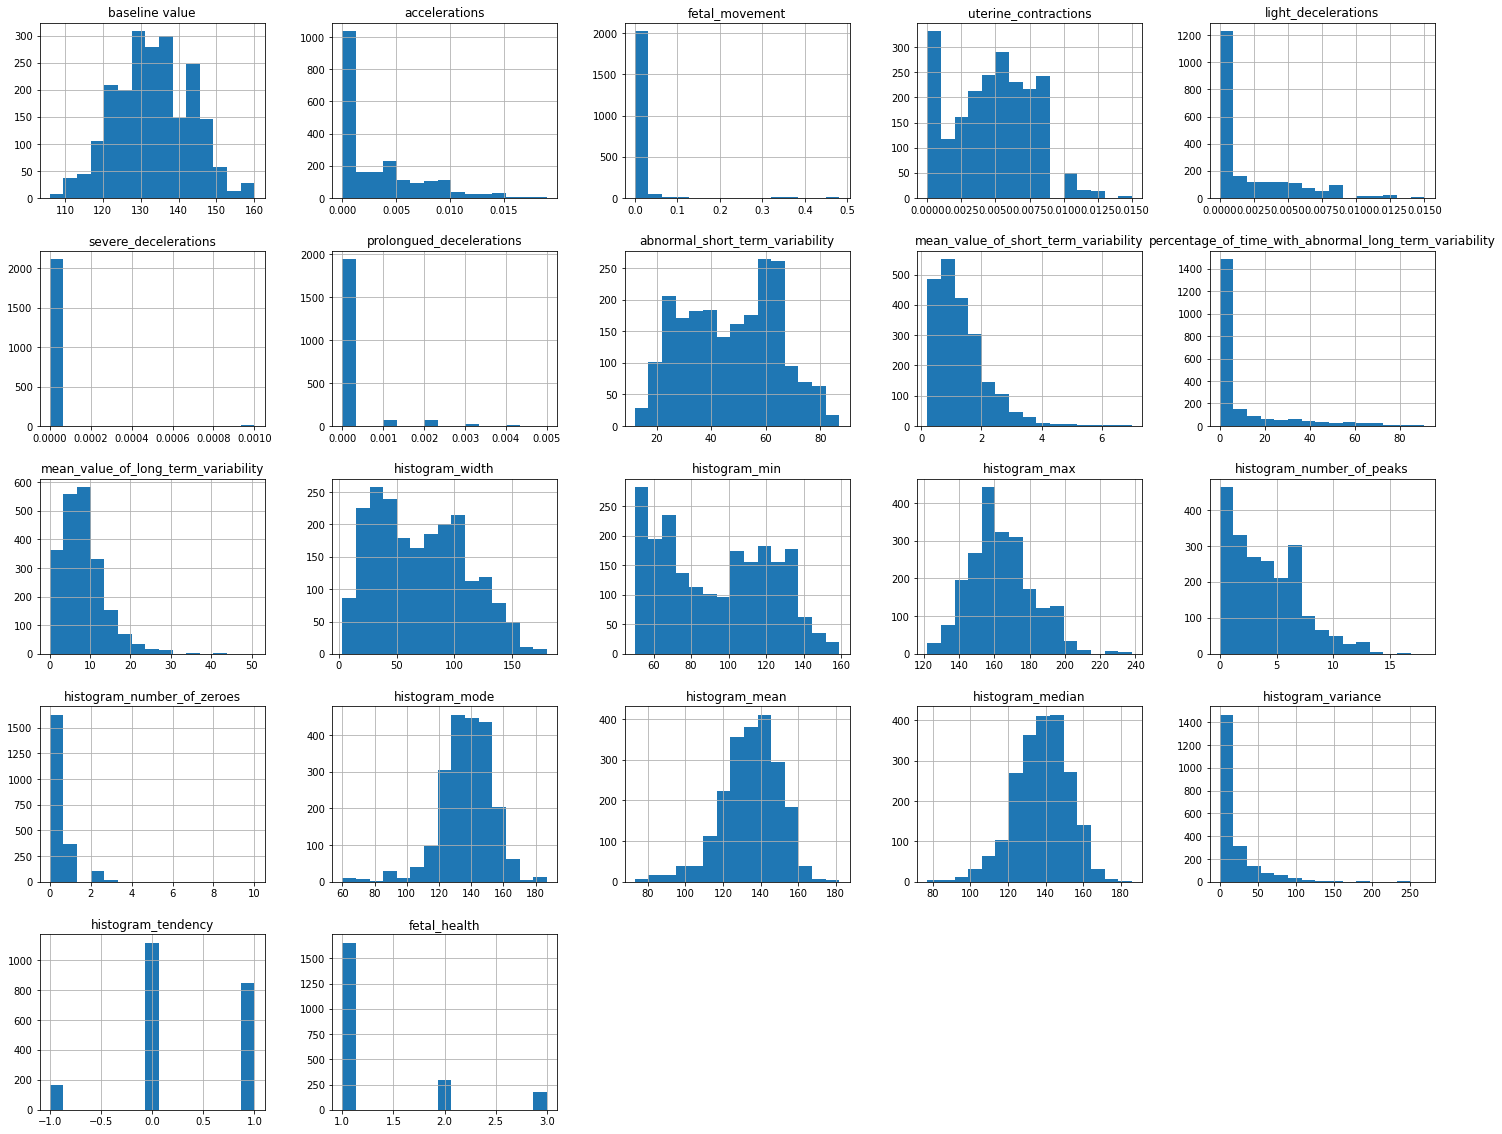

In [9]:
df.hist(figsize=(25,20),bins=15)

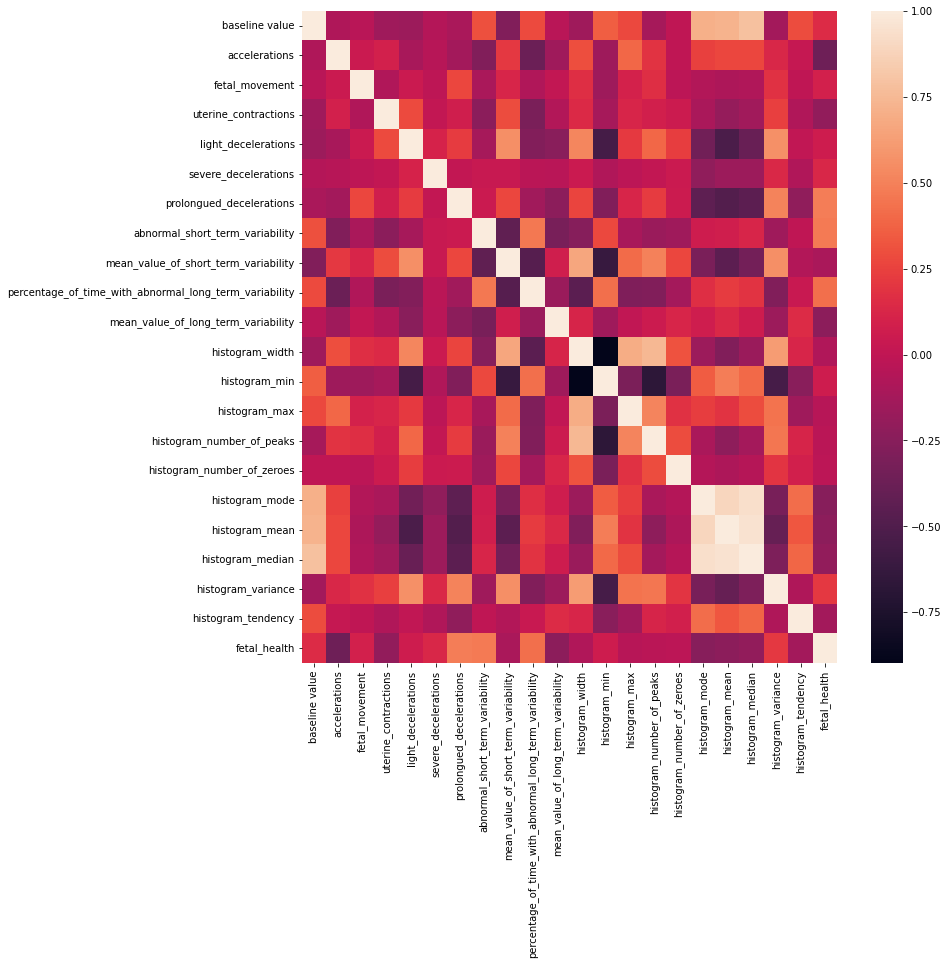

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr() )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

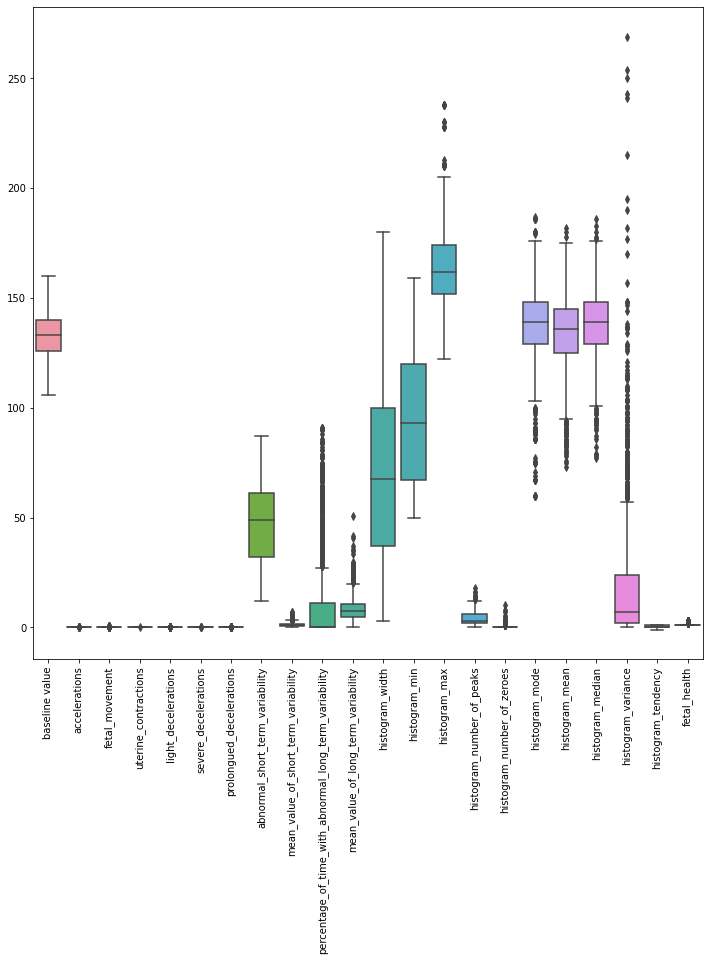

In [ ]:
plt.figure(figsize=(12,12))
sns.boxplot(data=df)
plt.xticks(rotation=90)

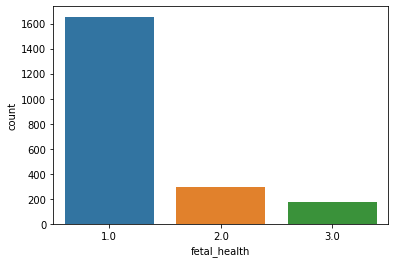

In [ ]:
sns.countplot(x='fetal_health',data=df)

In [ ]:
df.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

Matrix

In [10]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

model selection

1.Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
x = df.drop('fetal_health',axis=1)
y= df['fetal_health']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
from sklearn.model_selection import KFold,cross_val_score

In [15]:
model = LogisticRegression()

In [16]:
model.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(x_test)

In [18]:
 without_k_fold = accuracy_score(y_test,y_pred)*100

In [19]:
k = KFold(15)
result = cross_val_score(model,x,y,cv= k)
with_k_fold=np.mean(result)*100

In [20]:
d1 = pd.DataFrame({'without_k':without_k_fold,'with k':with_k_fold},index=['score'])

In [21]:
d1

,without_k,with k
score,84.952978,84.294609


2]decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model1 = DecisionTreeClassifier(max_depth=4)

In [24]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [25]:
y_pred1 = model1.predict(x_test)

In [26]:
result1 = accuracy_score(y_test,y_pred1)*100
result1

92.31974921630093

In [27]:
classification_report(y_test,y_pred1)

'              precision    recall  f1-score   support\n\n         1.0       0.93      0.97      0.95       496\n         2.0       0.85      0.69      0.77       101\n         3.0       0.95      0.90      0.92        41\n\n    accuracy                           0.92       638\n   macro avg       0.91      0.86      0.88       638\nweighted avg       0.92      0.92      0.92       638\n'

3]Random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier


In [29]:
model2 = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=4)

In [30]:
model2.fit(x_train,y_train)
y_pred2= model2.predict(x_test)

In [31]:
result2 = accuracy_score(y_test,y_pred2)*100
result2

91.37931034482759

In [32]:
classification_report(y_test,y_pred2)

'              precision    recall  f1-score   support\n\n         1.0       0.92      0.99      0.95       496\n         2.0       0.86      0.60      0.71       101\n         3.0       0.92      0.80      0.86        41\n\n    accuracy                           0.91       638\n   macro avg       0.90      0.80      0.84       638\nweighted avg       0.91      0.91      0.91       638\n'

4)SVM

In [33]:
from sklearn.svm import SVC

In [34]:
model3 = SVC().fit(x_train,y_train)

In [35]:
y_pred3 = model3.predict(x_test)

In [36]:
result3 = accuracy_score(y_test,y_pred3)*100
result3

85.42319749216301

In [37]:
classification_report(y_test,y_pred3)

'              precision    recall  f1-score   support\n\n         1.0       0.88      0.97      0.92       496\n         2.0       0.67      0.38      0.48       101\n         3.0       0.76      0.68      0.72        41\n\n    accuracy                           0.85       638\n   macro avg       0.77      0.67      0.71       638\nweighted avg       0.84      0.85      0.84       638\n'

5)KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
k=range(1,12)
acc=[]
for i in k :
  model4=KNeighborsClassifier(n_neighbors=i, weights="uniform", algorithm="auto", leaf_size=30, p=2, metric="minkowski", metric_params=None, n_jobs=None).fit(x_train,y_train)
  y_pred4 = model4.predict(x_test)
  acc.append(accuracy_score(y_test,y_pred4)*100)

In [40]:
acc

[88.71473354231975,
 88.40125391849529,
 88.24451410658307,
 88.08777429467085,
 87.61755485893417,
 87.7742946708464,
 87.61755485893417,
 87.93103448275862,
 88.71473354231975,
 89.18495297805643,
 89.34169278996865]

In [42]:
model4 = KNeighborsClassifier(n_neighbors=11, weights="uniform", algorithm="auto", leaf_size=30, p=2, metric="minkowski", metric_params=None, n_jobs=None).fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
result4 = accuracy_score(y_test,y_pred4)*100
result4

89.34169278996865

Text(0.5, 0, 'Model implement')

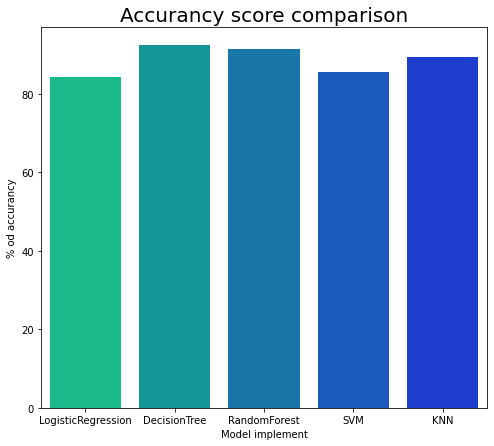

In [46]:
index =['LogisticRegression','DecisionTree','RandomForest','SVM','KNN']
y_sc = [with_k_fold,result1,result2,result3,result4]
plt.figure(figsize=(8,7))
sns.barplot(x=index,y=y_sc,palette='winter_r')
plt.xticks()
plt.title("Accurancy score comparison",fontsize=20)
plt.ylabel("% od accurancy")
plt.xlabel("Model implement")